In [61]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [62]:
data = pd.read_csv("../data/starcraft.csv")
data.head()
data.dropna(inplace=True)
data = data.drop(['GameID'], axis=1)

In [ ]:
data.dropna(inplace=True)

### Declare feature vector and target variable 

Following the steps from here:

https://www.kaggle.com/code/prashant111/k-means-clustering-with-python

In [64]:
X = data.drop(['LeagueIndex'],axis = 1)
y = data['LeagueIndex']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3338 entries, 0 to 3339
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 3338 non-null   float64
 1   HoursPerWeek        3338 non-null   float64
 2   TotalHours          3338 non-null   float64
 3   APM                 3338 non-null   float64
 4   SelectByHotkeys     3338 non-null   float64
 5   AssignToHotkeys     3338 non-null   float64
 6   UniqueHotkeys       3338 non-null   float64
 7   MinimapAttacks      3338 non-null   float64
 8   MinimapRightClicks  3338 non-null   float64
 9   NumberOfPACs        3338 non-null   float64
 10  GapBetweenPACs      3338 non-null   float64
 11  ActionLatency       3338 non-null   float64
 12  ActionsInPAC        3338 non-null   float64
 13  TotalMapExplored    3338 non-null   float64
 14  WorkersMade         3338 non-null   float64
 15  UniqueUnitsMade     3338 non-null   float64
 16  ComplexUnit

In [65]:
cols = X.columns

from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X = ms.fit_transform(X)

In [66]:
X = pd.DataFrame(X, columns=[cols])
X.head()

,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
0,0.392857,0.059524,0.002997,0.330799,0.081580,0.133287,0.162636,0.036382,0.106386,0.571893,0.112814,0.106991,0.164167,0.173358,0.260158,0.150420,0.0,0.000000,0.281758
1,0.250000,0.059524,0.004997,0.291411,0.076675,0.157412,0.204998,0.097391,0.117265,0.497565,0.113906,0.116732,0.169772,0.390529,0.220117,0.366717,0.0,0.067312,0.089822
2,0.500000,0.059524,0.000197,0.130248,0.025554,0.203586,0.124125,0.097248,0.125122,0.308128,0.164793,0.334272,0.121319,0.188221,0.131607,0.237158,0.0,0.061212,0.193314
3,0.107143,0.119048,0.000397,0.232595,0.023987,0.129285,0.031698,0.017653,0.147358,0.425632,0.097857,0.191793,0.174137,0.150066,0.068845,0.301388,0.0,0.124390,0.189158
4,0.571429,0.059524,0.000497,0.274168,0.026365,0.198584,0.114052,0.000000,0.360271,0.231676,0.069516,0.246796,0.444035,0.266682,0.216371,0.314564,0.0,0.006259,0.073626


### K-means model with two clusters

In [67]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0) 

kmeans.fit(X)

/Users/kuangchuyun/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [68]:
kmeans.inertia_

595.3760137519364

The lesser the model inertia, the better the model fit.

We can see that the model has very high inertia. So, this is not a good model fit to the data.

### Check quality of weak classification by the model

In [69]:
labels = kmeans.labels_
correct_labels = sum(y == labels + 1)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 182 out of 3338 samples were correctly labeled.
Accuracy score: 0.05


As the result shown above, we received a weak classification accuracy of only 10% by our unsupervised model. 

### Use elbow method to find optimal number of clusters 

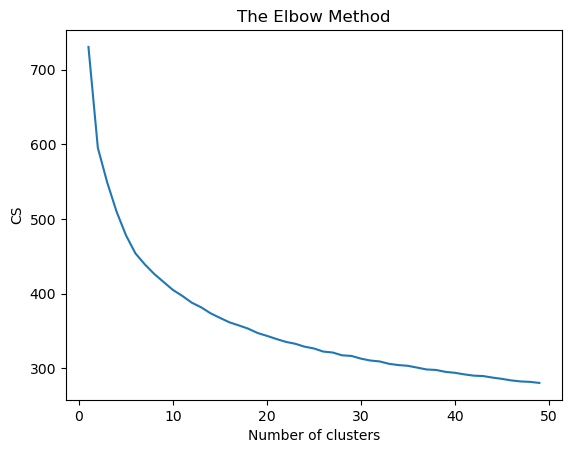

In [70]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cs = []
for i in range(1, 50):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 50), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

From the above plot, there is no obvious kink for k. 

But, we can try k = 8 in this case, since the there are total 8 ranks. 

### K-Means with 8 clusters 

In [71]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X)
labels = kmeans.labels_


/Users/kuangchuyun/anaconda3/envs/dsan5000/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [72]:
correct_labels = sum(y == labels + 1)
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))
print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Result: 555 out of 3338 samples were correctly labeled.
Accuracy score: 0.17


In [73]:
kmeans.inertia_

426.53977165898544

The model has very high inertia, so it is not a good model to fit the data. And the weak classification accuracy is 18%. 

In [74]:
data_valid = data.copy()

# Attach the cluster labels to this new DataFrame
data_valid['Cluster'] = kmeans.labels_

mean_leagues_per_cluster = data_valid.groupby('Cluster')['LeagueIndex'].mean()

print(mean_leagues_per_cluster)

Cluster
0    5.351351
1    2.908824
2    3.337232
3    3.033028
4    4.702970
5    4.573446
6    5.558559
7    4.630923
Name: LeagueIndex, dtype: float64


In [75]:
league_distribution = pd.crosstab(data_valid['Cluster'], data_valid['LeagueIndex'])

print(league_distribution)

LeagueIndex   1    2    3    4    5    6   7
Cluster                                     
0             0    0    5   18   48   74   3
1            53   75   95   88   25    4   0
2            39  103  134  140   77   20   0
3            64  122  161  138   50   10   0
4             4   10   30   67  110   81   1
5             1   15   40  103  117   75   3
6             1    1    7   23   94  184  23
7             5   21   81  234  283  173   5


### EDA

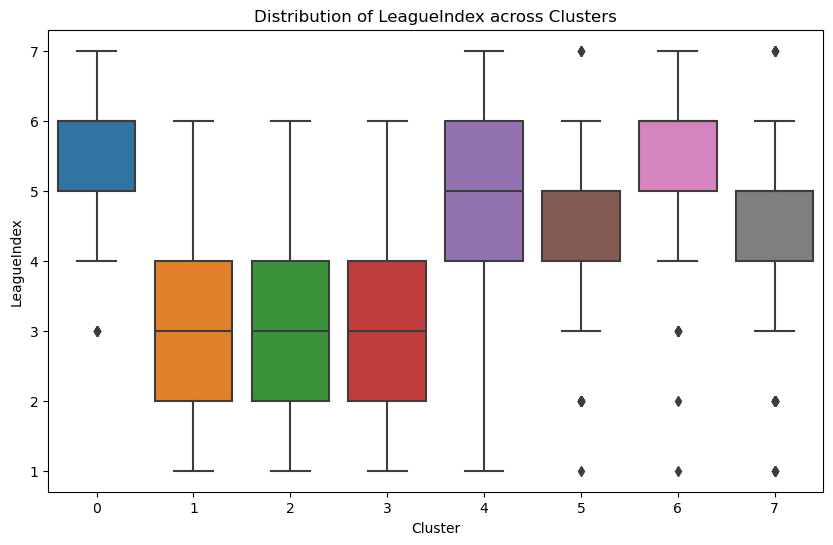

In [76]:
import seaborn as sns

data_long = pd.melt(data_valid, id_vars=['Cluster'], value_vars=['LeagueIndex'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_long, x='Cluster', y='value')
plt.title('Distribution of LeagueIndex across Clusters')
plt.xlabel('Cluster')
plt.ylabel('LeagueIndex')
plt.show()


In [77]:
from sklearn.metrics import silhouette_score

sil_scores = {}

#for each feature, determine avg silhouette scores after fitting and predicting then store
for feature in X.columns:
    curr_kmeans = KMeans(n_clusters=8, init ='random', n_init=10, max_iter=500, random_state=42)
    curr_clus_labels = curr_kmeans.fit_predict(X[[feature]])
    sil_avg = silhouette_score(X[[feature]], curr_clus_labels)
    sil_scores[feature] = sil_avg


#sort the avg silhouette scores for each feature
sorted_sil = sorted(sil_scores.items(), key = lambda x: x[1], reverse = True)

#report the top 3 features for clustering
for  i, (feature,score) in enumerate(sorted_sil[:3]):
    print(f'Top Feature {i+1} - {feature}: Silhouette score = {score}')

Top Feature 1 - ('ComplexUnitsMade',): Silhouette score = 0.8297768042409511
Top Feature 2 - ('ComplexAbilityUsed',): Silhouette score = 0.7239849195652184
Top Feature 3 - ('Age',): Silhouette score = 0.646429710874779


In [80]:
sorted_sil

[(('ComplexUnitsMade',), 0.8297768042409511),
 (('ComplexAbilityUsed',), 0.7239849195652184),
 (('Age',), 0.646429710874779),
 (('HoursPerWeek',), 0.6259330917529188),
 (('MinimapAttacks',), 0.6174338523955643),
 (('TotalHours',), 0.5608336992287654),
 (('SelectByHotkeys',), 0.5466090501857875),
 (('MinimapRightClicks',), 0.5420026453852204),
 (('AssignToHotkeys',), 0.5341763620323878),
 (('MaxTimeStamp',), 0.5326717685561968),
 (('ActionsInPAC',), 0.5319550267397107),
 (('UniqueHotkeys',), 0.5304047435905551),
 (('UniqueUnitsMade',), 0.5279482620483795),
 (('TotalMapExplored',), 0.5276579122778182),
 (('APM',), 0.5266850405255671),
 (('ActionLatency',), 0.5263549066733025),
 (('GapBetweenPACs',), 0.5223282751354458),
 (('WorkersMade',), 0.5187597511138574),
 (('NumberOfPACs',), 0.5187114542174862)]

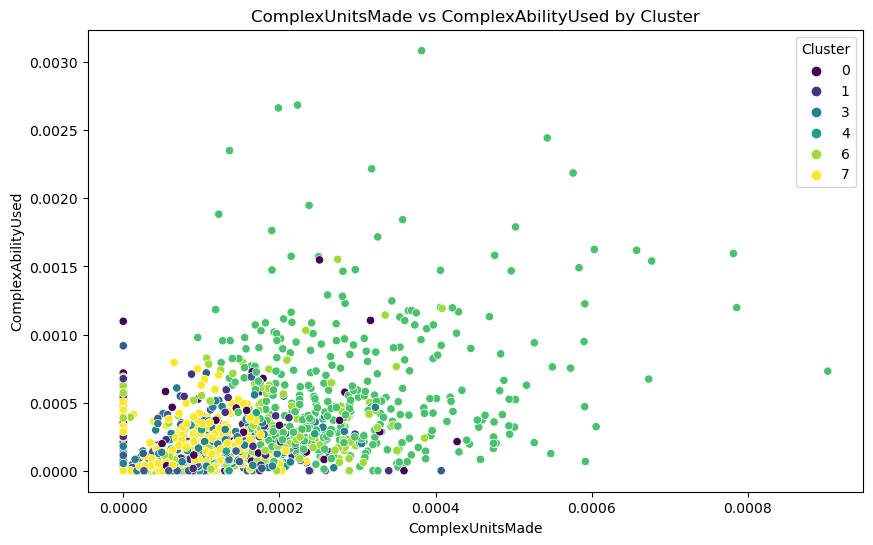

In [79]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ComplexUnitsMade', y='ComplexAbilityUsed', hue='Cluster', data=data_valid, palette='viridis')
plt.title('ComplexUnitsMade vs ComplexAbilityUsed by Cluster')
plt.xlabel('ComplexUnitsMade')
plt.ylabel('ComplexAbilityUsed')
plt.legend(title='Cluster')
plt.show()
